In [ ]:
#!pip install keras
#!pip install tensorflow
#!pip install --upgrade keras tensorflow
#!pip install --upgrade opencv-python

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input
#from keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
#import cv2
from keras.models import model_from_json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    #rotation_range=30,
                                    #shear_range=0.3,
                                    #zoom_range=0.3,
                                    #horizontal_flip=True,
                                    #fill_mode='nearest'
                                   )
validation_data_gen = ImageDataGenerator(rescale=1./255, 
                                    #rotation_range=30,
                                    #shear_range=0.3,
                                    #zoom_range=0.3,
                                    #horizontal_flip=True,
                                    #fill_mode='nearest'
                                    )

train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

total_train_samples = train_generator.n
total_validation_samples = validation_generator.n
batch_size = 64


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
emotion_model = Sequential()

emotion_model.add(Input(shape=(48,48,1)))

emotion_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
emotion_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
 
emotion_model.summary()
 
#cv2.ocl.setUseOpenCL(False)
 
#initial_learning_rate = 0.0001
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, 
                               decay_rate=0.96)
 
#optimizer = Adam(learning_rate=lr_schedule, amsgrad=True)
optimizer = RMSprop(learning_rate=initial_learning_rate)
 
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 44, 44, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,239 (4.57 MB)

 Trainable params: 1,199,239 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=total_train_samples // batch_size,
    #epochs=30,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=total_validation_samples // batch_size
)

Epoch 1/50


C:\Users\Areen\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 141s 310ms/step - accuracy: 0.2428 - loss: 1.8227 - val_accuracy: 0.3474 - val_loss: 1.6571
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.3750 - loss: 0.7820 - val_accuracy: 0.3000 - val_loss: 0.9463
Epoch 3/50


C:\Users\Areen\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4076 - loss: 1.5237 - val_accuracy: 0.5015 - val_loss: 1.3021
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.5000 - loss: 0.6045 - val_accuracy: 0.3000 - val_loss: 0.6942
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4943 - loss: 1.3213 - val_accuracy: 0.5338 - val_loss: 1.2123
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.5000 - loss: 0.5980 - val_accuracy: 0.5000 - val_loss: 0.7041
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5451 - loss: 1.1930 - val_accuracy: 0.5552 - val_loss: 1.1681
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.5938 - loss: 0.5464 - val_accuracy: 0.7000 - val_loss: 0.4759
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5751 - loss: 1.1275 - val_accuracy: 0.5660 - val_loss: 1.1412
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.7188 - loss: 0.4367 - val_accuracy: 

In [5]:
emotion_model.evaluate(validation_generator)
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6031 - loss: 1.5350


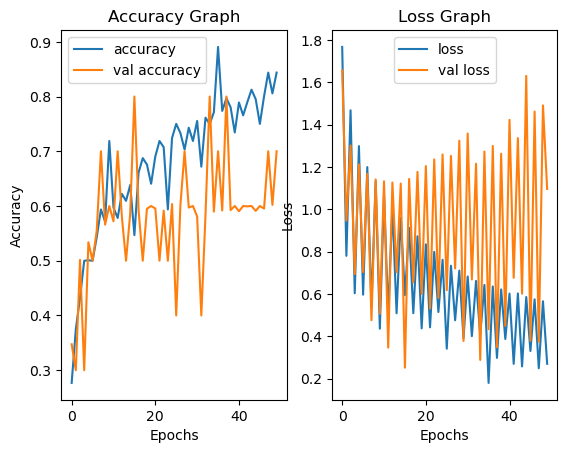

In [6]:
# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()